# Diamond Price Prediction for Xi Diamonds Inc.

**A Regression Analysis Approach**

Project Submission of **Lore Eugene Abing**

### Overview

In this project, I dived deep into the world of diamond valuation using advanced regression modeling. My primary goal was to understand how factors like carat, cut, and clarity affect a diamond's price. 


This hands-on approach not only provided insights into the diamond market but also enhanced my data science skills. Through this journey, I aimed to grow as a data scientist, focusing on understanding the intricate relationships between diamond attributes and their impact on market pricing.

### Dataset Summary

Each record in the [dataset](https://www.kaggle.com/datasets/vittoriogiatti/diamondprices/data) represents a random diamond 💎 💍 with its unique characteristics. It should be relatively straightforward to create a model for predicting its market price based on objective variables or to attempt clustering the observations without considering clarity, which refers to the 'purity' of the stone.

- **carat** weight of the diamond, 1 carat is equivalent to 200 milligrams.
- **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal).
- **color** the international "Diamond Color Scale". From D(worst), E, F, G, H, I, J(best).
- **clarity** the international "Diamond Clarity Scale". its based on the number of impurities. From I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best).
- **depth** percentage format of z / x.
- **table** size top of diamond.
- **x** dimension in millimetres(mm).
- **y** dimension in millimetres(mm).
- **z** dimension in millimetres(mm).
- **price** in US dollars.

### Business Problem

**Background**

Xi Diamonds Inc. is a major diamond retailer with a vast online presence. Over the years, they have accumulated data on diamond sales, capturing attributes like carat, cut, color, clarity, and depth of thousands of diamonds they've sold. The company aims to understand the key drivers behind the pricing of diamonds to make informed business decisions, such as procurement, pricing strategy, and marketing.

**Problem Statement:**

Recently, there has been a fluctuation in the price of diamonds in the global market. Xi Diamonds Inc. wants to know:

1. Which attributes significantly impact the price of a diamond?
2. By how much does a change in each of these attributes alter the diamond's price?

This understanding will allow the company to set competitive prices, strategize their marketing efforts, and communicate value propositions more effectively to their customers.



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

**Loading and Understading the data**

In [2]:
# loading data
data  = pd.read_csv('data/DiamondsPrices.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


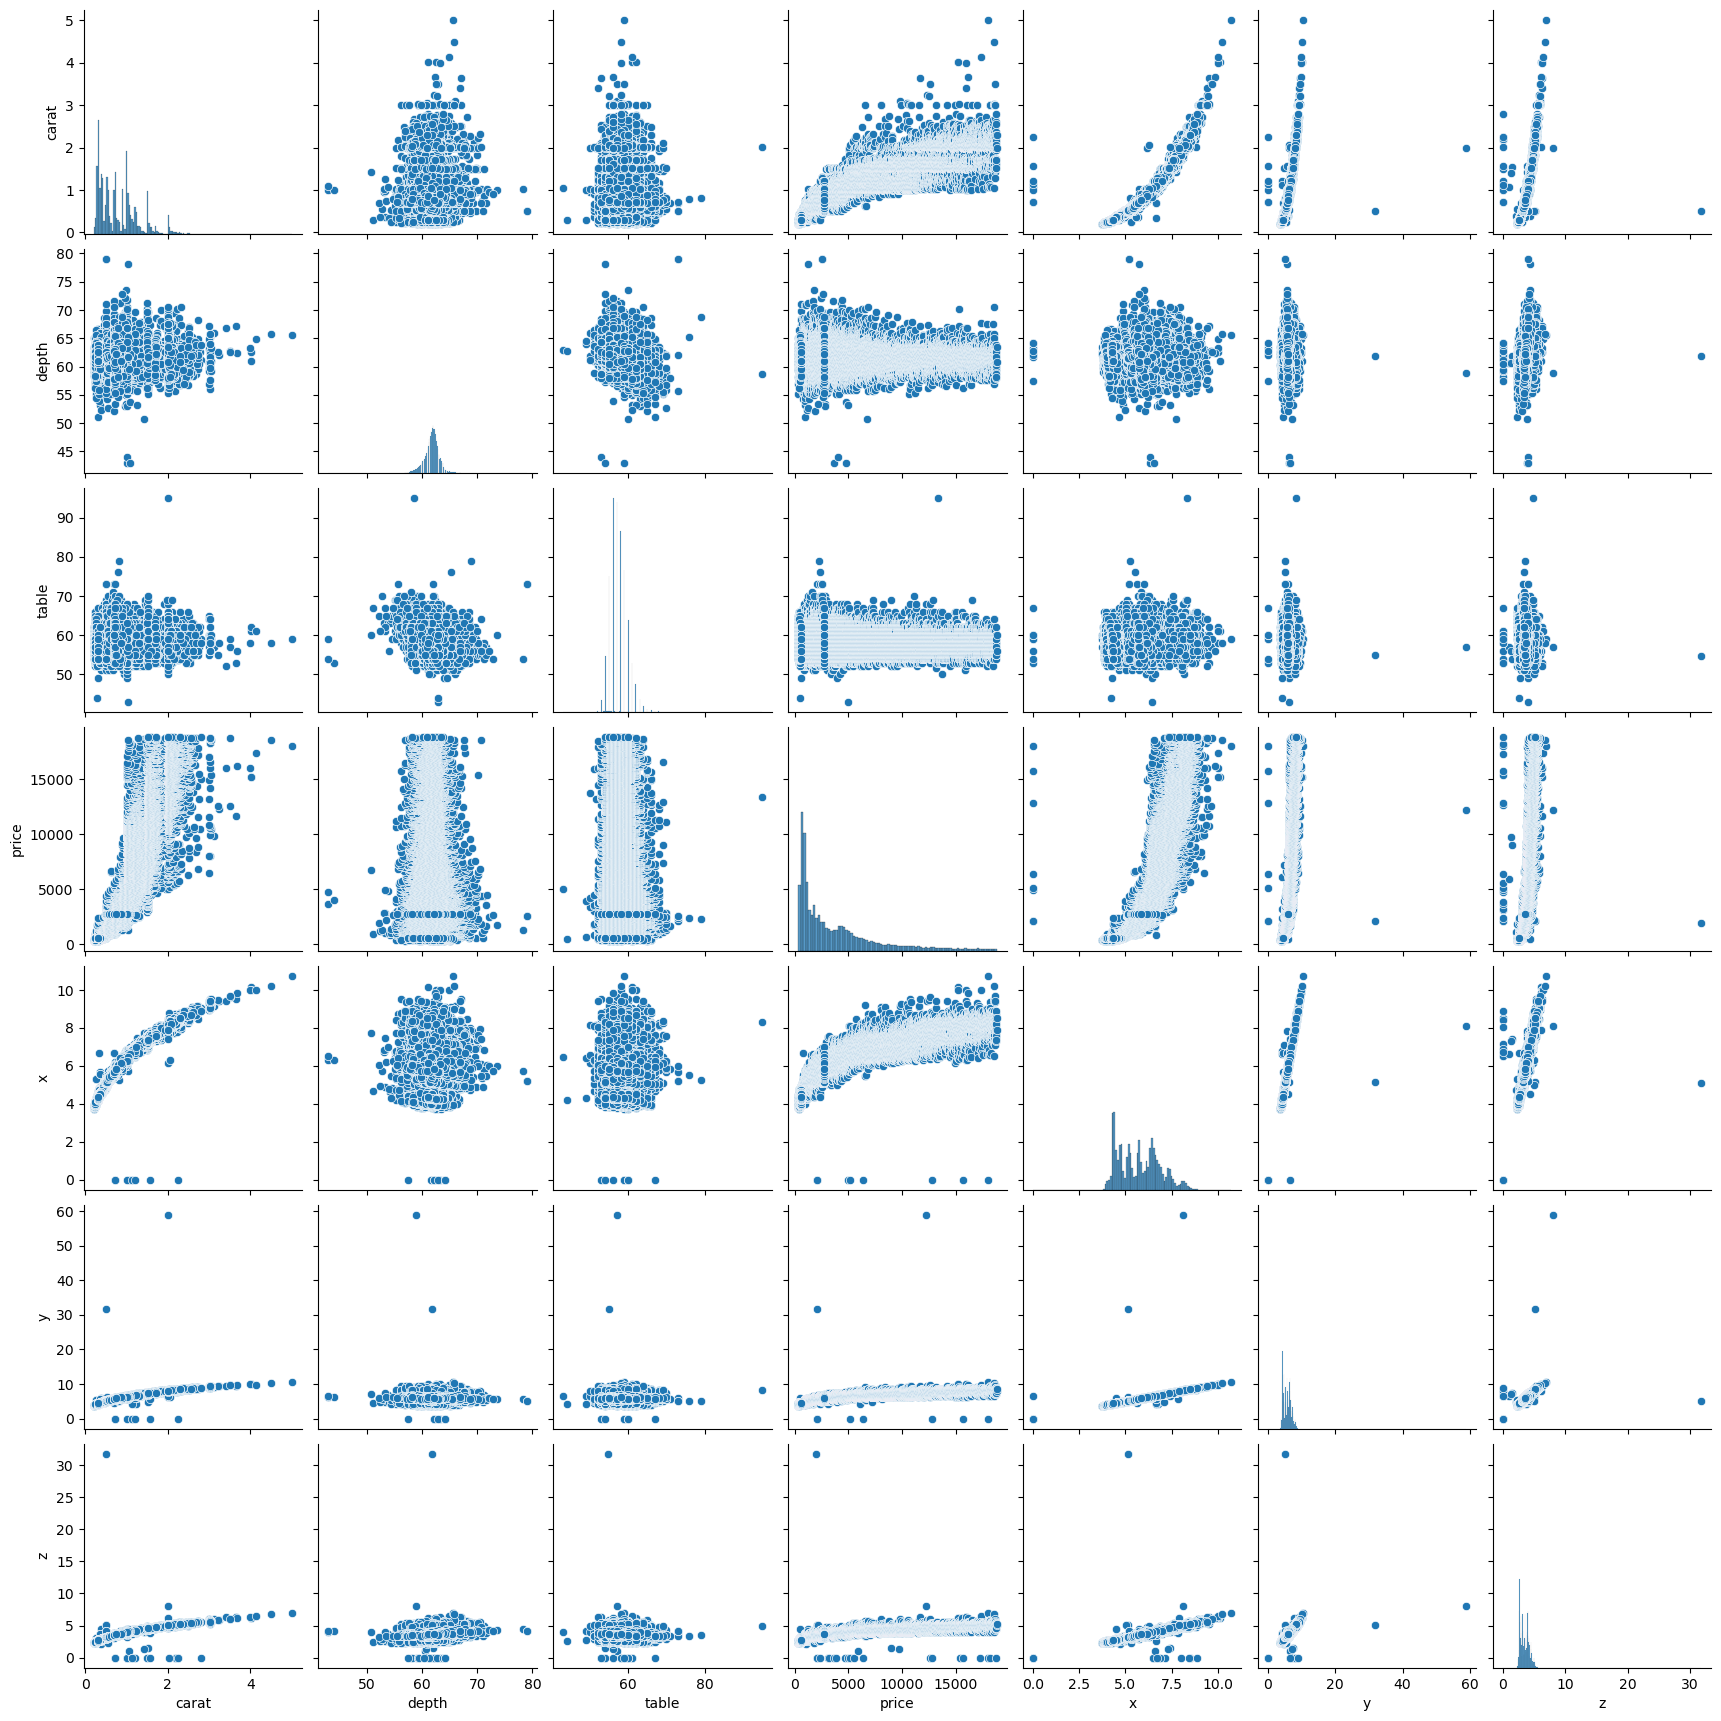

In [3]:
sns.pairplot(data);

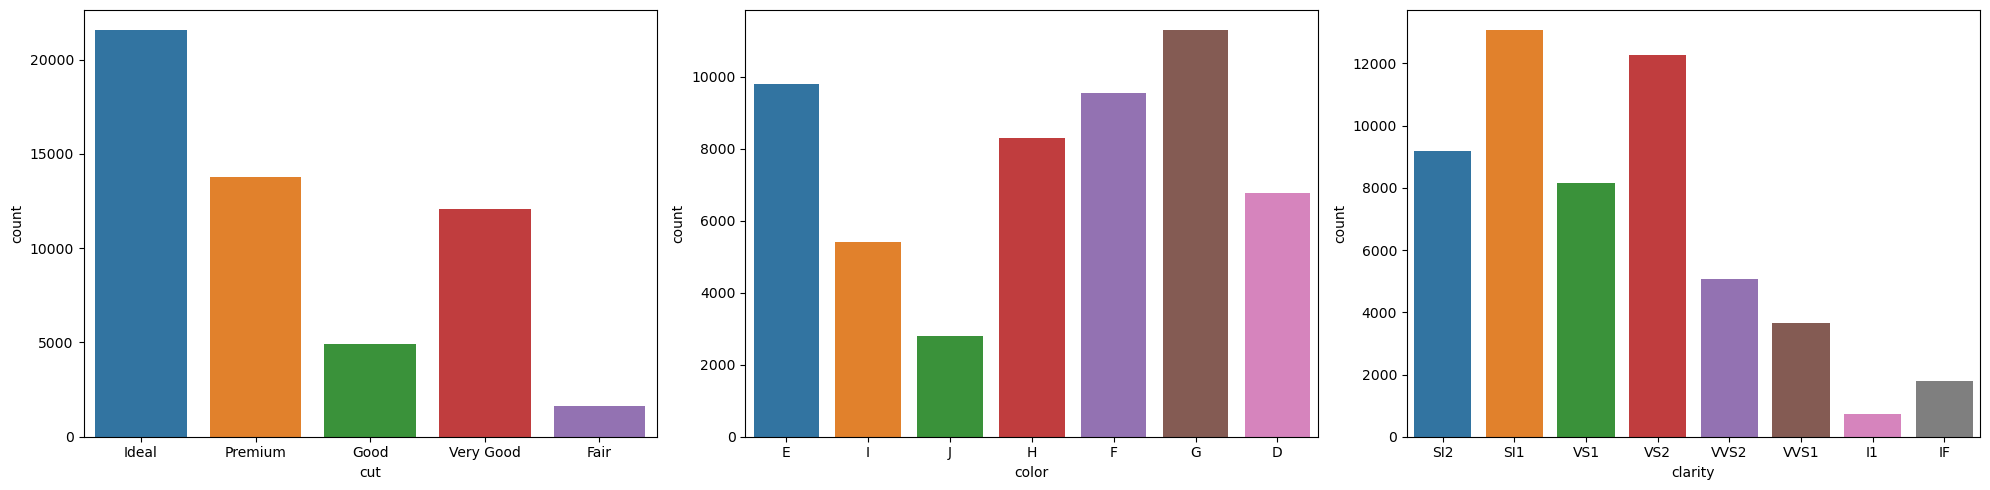

In [4]:
# plotting the categorised variables
fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.countplot(data=data, x='cut', ax=axes[0])
sns.countplot(data=data, x='color', ax=axes[1])
sns.countplot(data=data, x='clarity', ax=axes[2])

plt.tight_layout()
plt.show()

<Axes: xlabel='price', ylabel='Count'>

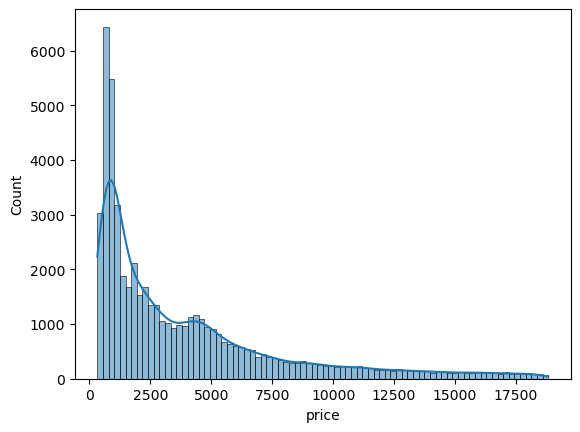

In [65]:
# plotting our dependent feature.
sns.histplot(data=data, x="price", kde=True)

### Cleaning and Preparing

> The dataset has been partially cleaned; we just need to make a few adjustments.

In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Dropping 0s**

> There are 0 values in columns x, y, and z. Since they are 0, we need to drop them as they hold no value

In [6]:
# getting rid of null values
data = data[data.x != 0]
data = data[data.y != 0]
data = data[data.z != 0]
data.shape

(53920, 10)

>Only 20 data points were dropped out of nearly 54,000

**Fixing Categories**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
# checking the dtype = objects
print(f"Cuts: {len(data['cut'].unique())}")
print(f"Colors: {len(data['color'].unique())}")
print(f"Clarity: {len(data['clarity'].unique())}")

Cuts: 5
Colors: 7
Clarity: 8


In [9]:
# creating dummies of categorical variables
cut_dummies = pd.get_dummies(data['cut'], prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(data['color'], prefix='color', drop_first=True)
clarity_dummies = pd.get_dummies(data['clarity'], prefix='clarity', drop_first=True)

In [10]:
# dropping off columns
data = data.drop(['cut','color','clarity'], axis=1)

In [11]:
# combining new df and the dummy columns
data = pd.concat([data, cut_dummies, color_dummies, clarity_dummies], axis=1)

In [12]:
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [13]:
data.rename(columns= {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

**Feature Engineering**


I need to include a calculation for [total depth](https://www.diamonds.pro/education/diamond-depth-and-table/#:~:text=The%20depth%20of%20a%20diamond,height%20by%20its%20total%20width.), as all the necessary dimensions are provided in the dataset.

In [14]:
data['total_depth'] = (data['z'] / (data['x'] + data['y'])) * 100

In [15]:
data = data.drop(['x','y','z'], axis=1)
data

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,total_depth
0,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,30.643127
1,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,29.883571
2,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,28.448276
3,0.29,62.4,58.0,334,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,31.198102
4,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,31.645570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,30.408341
53936,0.72,63.1,55.0,2757,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,31.555944
53937,0.70,62.8,60.0,2757,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,31.393298
53938,0.86,61.0,58.0,2757,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,30.480848


> Seems like we have the following in:
>
> Continues variables:
>- carat
>- depth
>- table
>- price
>- total_depth (feature engineering)
>
> Categorical variables:
>- cut
>- color
>- clarity

> I am satisfied with our exploratory data analysis (EDA). Now, let's proceed to build our first iteration.

---
### Iteration 1

In [16]:
# Creating new df to avoid messing with the original one
df1 = data.copy()

In [17]:
# making the first iteration
Y = 'price'
X1 = df1.drop(['price'], axis = 1)
X1_columns = "+".join(X1.columns)

In [18]:
ols_formula = Y + "~" + X1_columns

OLS = ols(formula = ols_formula, data = df1)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.800e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:25:18   Log-Likelihood:            -4.5676e+05
No. Observations:               53920   AIC:                         9.136e+05
Df Residuals:                   53898   BIC:                         9.138e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4548.9067    373.508    -12.179      0.000   -5280.986   -3816.827
carat          8894.2212     12.082    736.170      0.000    8870.541    8917.902
depth           -20.6986      4.537     -4.562      0.000     -29.591     -11.807
table           -24.7097      2.978     -8.298      0.000     -30.546     -18.873
cut_Good        614.4667     34.341     17.893      0.000     547.158     681.776
cut_Ideal       877.4507     34.152     25.693      0.000     810.513     944.388
cut_Premium     804.8056     32.957     24.420      0.000     740.210     869.402
cut_Very_Good   778.1406     32.935     23.626      0.000     713.587     842.694
color_E        -209.7757     18.298    -11.464      0.000    -245.640    -173.912
color_F        -303.0087     18.493    -16.385      0.000    -339.255    -266.763
color_G        -504.9790     18.112    -27.881      0.000    -540.479    -469.479
color_H        -977.4734     19.264    -50.740      0.000   -1015.231    -939.715
color_I       -1436.7872     21.635    -66.411      0.000   -1479.192   -1394.383
color_J       -2321.0652     26.705    -86.914      0.000   -2373.408   -2268.723
clarity_IF     5402.7251     52.230    103.441      0.000    5300.354    5505.096
clarity_SI1    3566.9563     44.657     79.875      0.000    3479.428    3654.484
clarity_SI2    2618.9736     44.858     58.383      0.000    2531.051    2706.896
clarity_VS1    4524.3832     45.617     99.183      0.000    4434.974    4613.792
clarity_VS2    4209.1112     44.911     93.722      0.000    4121.086    4297.137
clarity_VVS1   5058.6179     48.289    104.758      0.000    4963.971    5153.264
clarity_VVS2   4956.0691     46.967    105.523      0.000    4864.014    5048.125
total_depth      -0.9951      4.059     -0.245      0.806      -8.950       6.960
==============================================================================
Omnibus:                    15247.217   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184942.170
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                      11.843   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> -  R-squared of 0.916 indicates that the model explains 91.6% of the variance in the dependent variable. This is typically considered very high.
> - Skew (1.016) indicates a moderately positively skewed distribution.
> - Kurtosis (11.843), significantly higher than 3, indicating a distribution with heavy tails and potentially many outliers.
> - Cond. No. is high, often indicates potential multicollinearity problems.

**Model assumption: Linearity**

Identify which variables have a linear relationship with the target variable price

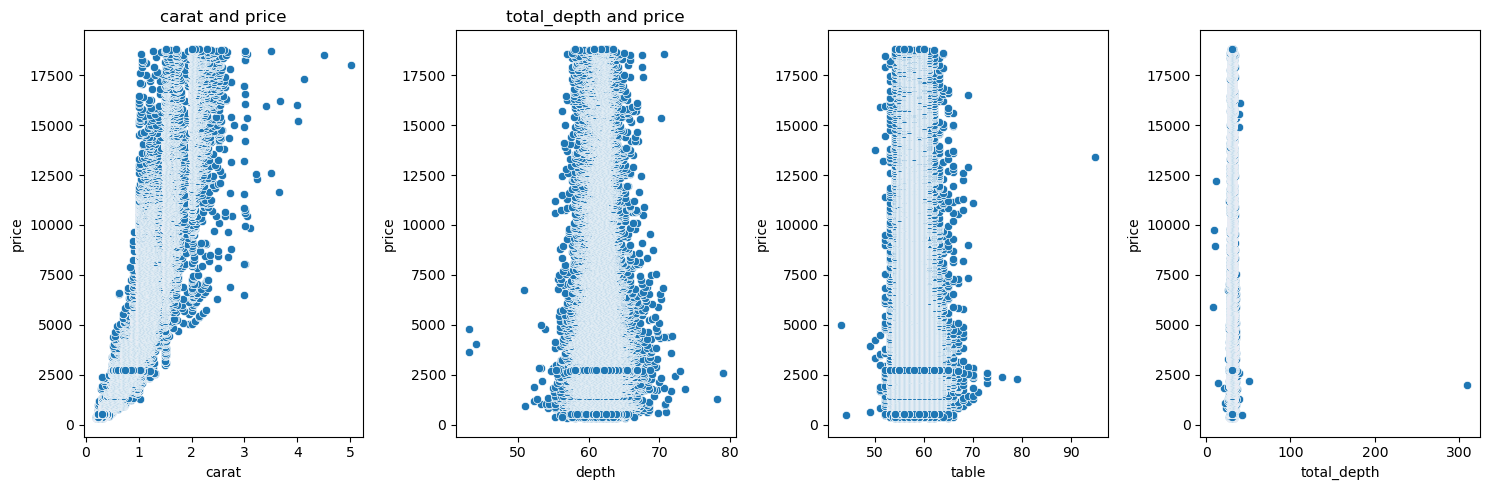

In [19]:
fig, axes = plt.subplots(1, 4, figsize = (15,5))

sns.scatterplot(x = df1['carat'], y = df1['price'],ax=axes[0])
axes[0].set_title("carat and price")

sns.scatterplot(x = df1['depth'], y = df1['price'],ax=axes[1])
axes[1].set_title("depth and price")

sns.scatterplot(x = df1['table'], y = df1['price'],ax=axes[2])
axes[1].set_title("table and price")

sns.scatterplot(x = df1['total_depth'], y = df1['price'],ax=axes[3])
axes[1].set_title("total_depth and price")

plt.tight_layout()
plt.show()

> The linearity is difficult to discern due to the presence of outliers.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

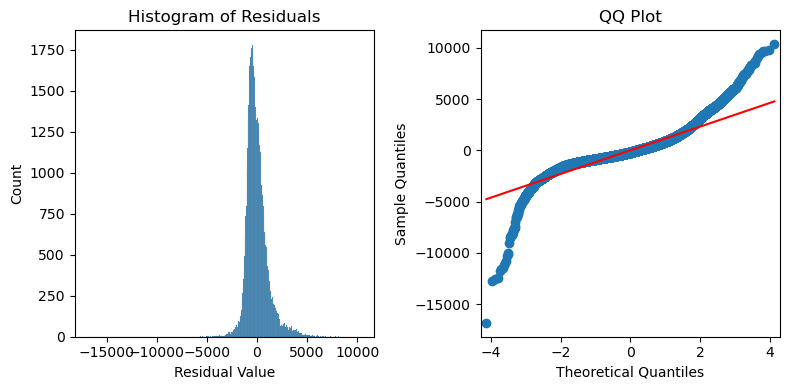

In [20]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- I observe a mild negative skewness in the histogram, as well as heavier tails compared to the normal distribution.
>- The residuals in the Q-Q plot appear not a straight line, also showing some potential outliers.

**Model assumption: Constant variance**

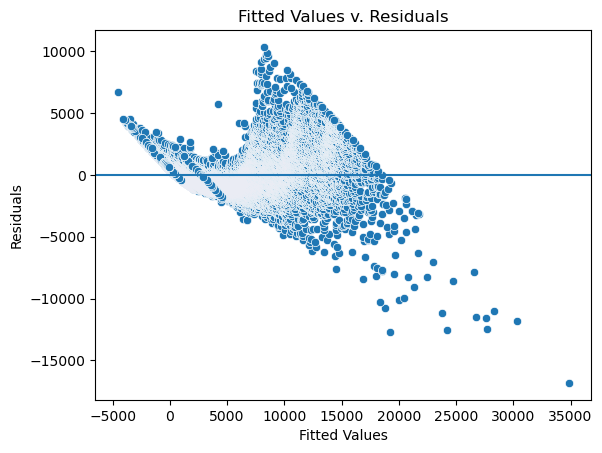

In [21]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

> Seems displaying patterns, indicating a violation of the constant variance assumption.

**Model assumption: No multicollinearity**

In [22]:
# checking correlation on each independet variables.
X1.corr()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,total_depth
carat,1.000000,0.028259,0.181646,0.034049,-0.163484,0.115887,0.009830,-0.139070,-0.059899,-0.029283,...,0.161595,0.180291,-0.114428,0.062743,0.267412,-0.062962,-0.038896,-0.167627,-0.136950,0.012580
depth,0.028259,1.000000,-0.295733,0.135790,-0.022793,-0.198197,0.025751,-0.028761,-0.017855,0.002883,...,0.022635,0.022534,-0.030907,0.040907,0.007127,-0.024059,-0.009518,-0.023528,-0.019276,0.500647
table,0.181646,-0.295733,1.000000,0.175092,-0.549651,0.338192,0.120199,0.007249,-0.004927,-0.039034,...,0.018013,0.037304,-0.078767,0.052033,0.095208,-0.027025,-0.009302,-0.069147,-0.062247,-0.153222
cut_Good,0.034049,0.135790,0.175092,1.000000,-0.258005,-0.185287,-0.169930,0.007082,0.006742,-0.024875,...,0.006256,0.015016,-0.033033,0.056073,0.041694,-0.017048,-0.020942,-0.037523,-0.038597,0.067379
cut_Ideal,-0.163484,-0.022793,-0.549651,-0.258005,1.000000,-0.478029,-0.438409,-0.001195,0.001323,0.034679,...,-0.009240,-0.038540,0.104967,-0.082923,-0.108128,0.034217,0.015535,0.088389,0.075459,-0.016527
cut_Premium,0.115887,-0.198197,0.338192,-0.185287,-0.478029,1.000000,-0.314845,-0.018388,-0.011986,0.003890,...,0.005880,0.017296,-0.053985,0.023278,0.067482,-0.011735,0.022760,-0.053935,-0.061890,-0.101007
cut_Very_Good,0.009830,0.025751,0.120199,-0.169930,-0.438409,-0.314845,1.000000,0.023641,0.003144,-0.025064,...,-0.001568,0.009781,-0.033035,0.032512,0.004977,-0.006888,-0.016511,-0.005255,0.015236,0.019760
color_E,-0.139070,-0.028761,0.007249,0.007082,-0.001195,-0.018388,0.023641,1.000000,-0.218444,-0.242414,...,-0.157539,-0.110446,-0.044898,0.005895,0.005646,-0.027291,0.027948,-0.001514,0.011627,-0.008111
color_F,-0.059899,-0.017855,-0.004927,0.006742,0.001323,-0.011986,0.003144,-0.218444,1.000000,-0.238489,...,-0.154988,-0.108658,0.018547,-0.020389,-0.002553,-0.011008,0.003870,0.016947,0.013138,-0.011309
color_G,-0.029283,0.002883,-0.039034,-0.024875,0.034679,0.003890,-0.025064,-0.242414,-0.238489,1.000000,...,-0.171995,-0.120581,0.077974,-0.080629,-0.045741,0.055596,-0.023873,0.042502,0.059820,0.001042


In [23]:
abs(X1.corr()) > 0.75

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,total_depth
carat,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
depth,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
table,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cut_Good,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cut_Ideal,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cut_Premium,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cut_Very_Good,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
color_E,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
color_F,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
color_G,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df=X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [25]:
X1.columns

Index(['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very_Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'total_depth'],
      dtype='object')

In [26]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


> No pairs were deteced with correlation value.

> Let's check with VIF

In [27]:
# Calculate the variance inflation factor.

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
X = X1[['carat', 'depth', 'table', 'total_depth']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
carat,3.929027
depth,1024.432850
table,397.053688
total_depth,635.306000


> depth has the highest VIF

In [28]:
# Let's do it again and exclude depth.
X = X1[['carat', 'table', 'total_depth']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
carat,3.922604
table,247.391577
total_depth,241.593295


> Still showing high variance for both table and total_depth, carat VIF score is acceptable

In [29]:
# Let's do it again and exclude depth and table this time.
X = X1[['carat', 'total_depth']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
carat,3.819346
total_depth,3.819346


> Now we have acceptable VIF value for both carat and total_depth.

---
### Iteration 2

**Adjustments**: Addressing issues in Iteration 1 (First Model)
1. As suggested in multicollinearity, we are going to drop the columns of depth and table.
2. Deal with possible outliers.
3. We will apply Log Transformation to handle the distribution and skewness of our data.
4. Apply Standardisation (Z-score Normalisation).

**Dropping columns**
> Also, created a new dataset for the second model.

In [30]:
df2 = df1.drop(columns=['depth', 'table'])

**Relevant continues variables vs the dependent variable**

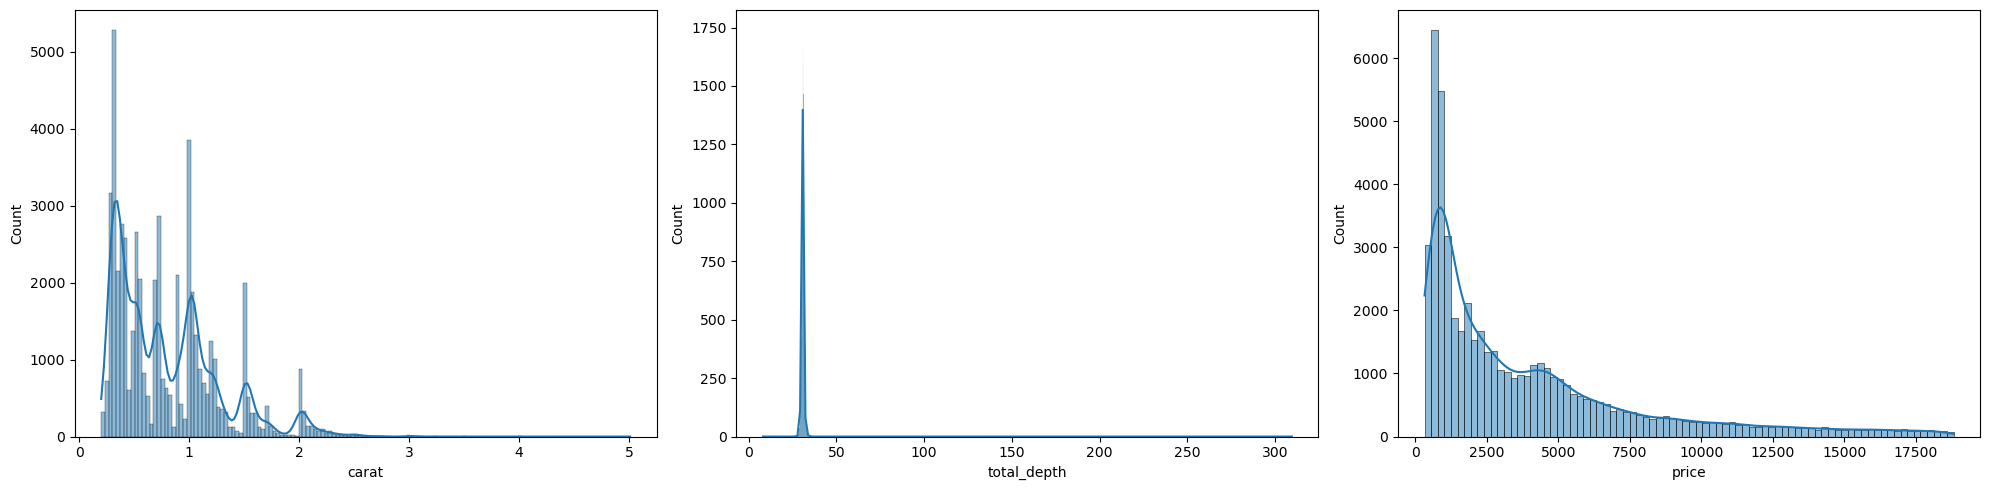

In [31]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(data=df2, x="carat", kde=True, ax=axes[0])
sns.histplot(data=df2, x="total_depth", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

> Inspecting the skewness of our continuous variables, we observe that they are heavily tailed on the right, indicating a right-skewed distribution.

> We plot this to see the changes after log transformation. But before applying the log transformation, our next step is to address outliers in the data.

**Dealing with outliers**

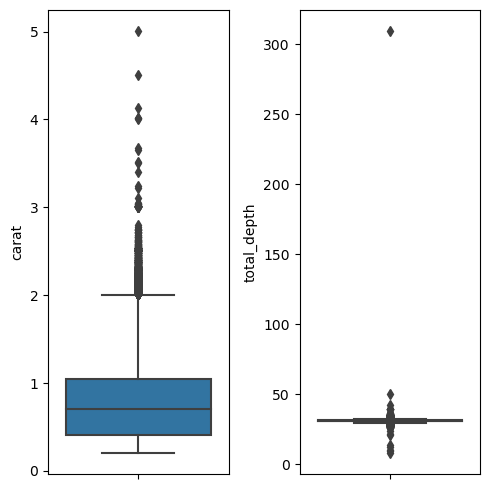

In [32]:
# Checking with boxplot
fig, axes = plt.subplots(1, 2, figsize = (5,5))

sns.boxplot(y='carat', data=df2, ax=axes[0])
sns.boxplot(y='total_depth', data=df2, ax=axes[1])

plt.tight_layout()
plt.show()

> The boxplot displays the obvious outliers; we'll deal with them.

In [33]:
# Reduce outliers by reducing data size to 3 standard deviations

filter_cols = ['carat', 'total_depth']

df2 = df2[~df2[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

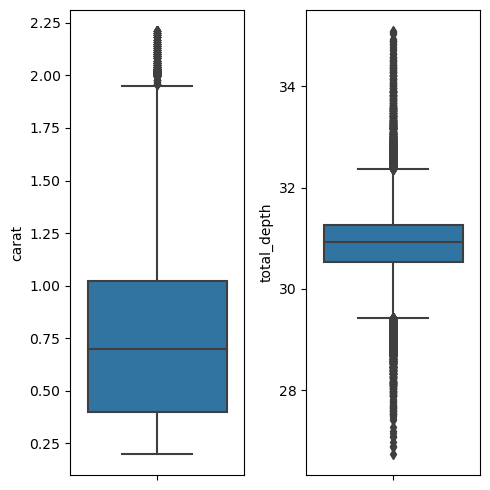

In [34]:
# rehhecking with boxplot
fig, axes = plt.subplots(1, 2, figsize = (5,5))

sns.boxplot(y='carat', data=df2, ax=axes[0])
sns.boxplot(y='total_depth', data=df2, ax=axes[1])

plt.tight_layout()
plt.show()

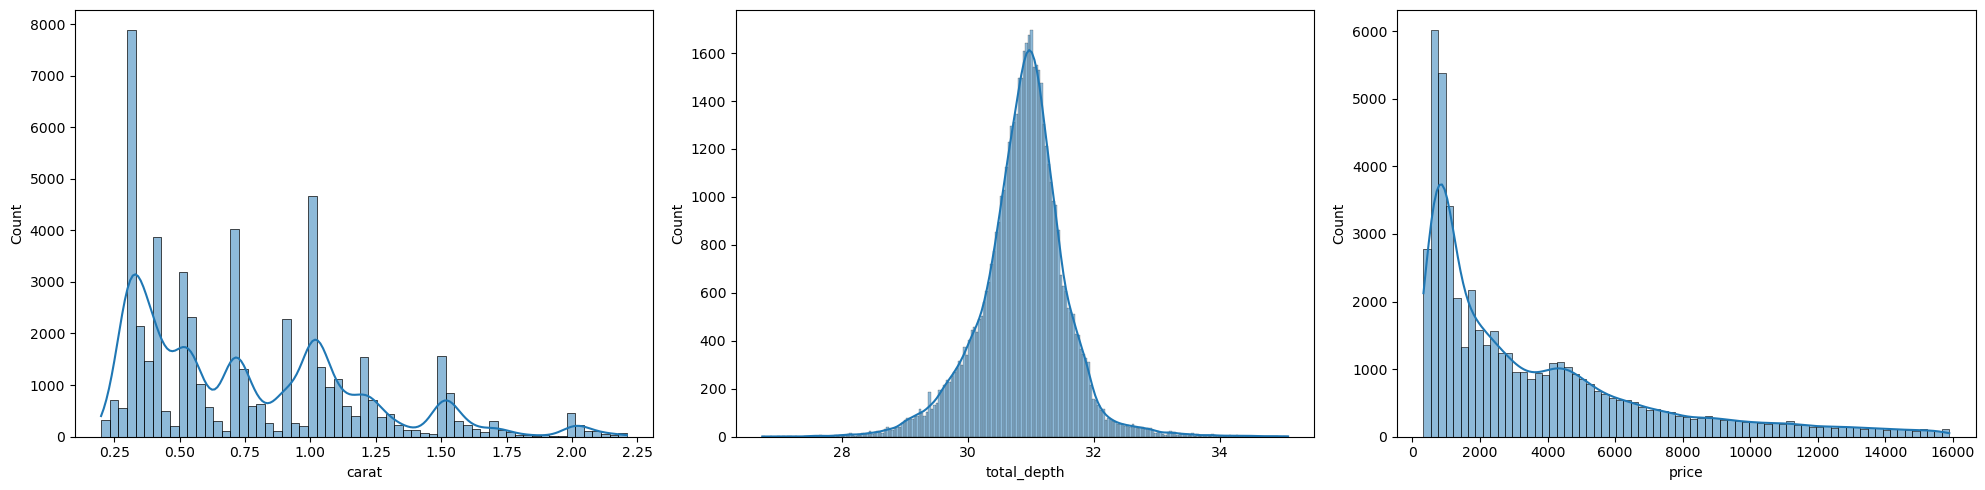

In [35]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(data=df2, x="carat", kde=True, ax=axes[0])
sns.histplot(data=df2, x="total_depth", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

>Simply by reducing the data size to exclude values beyond three standard deviations, we've observed an improvement in our dataset

**Log Transformation**

In [36]:
# Log transform carat and price as it display skewness above
df2['carat'] = np.log(df2['carat'])
df2['price'] = np.log(df2['price'])

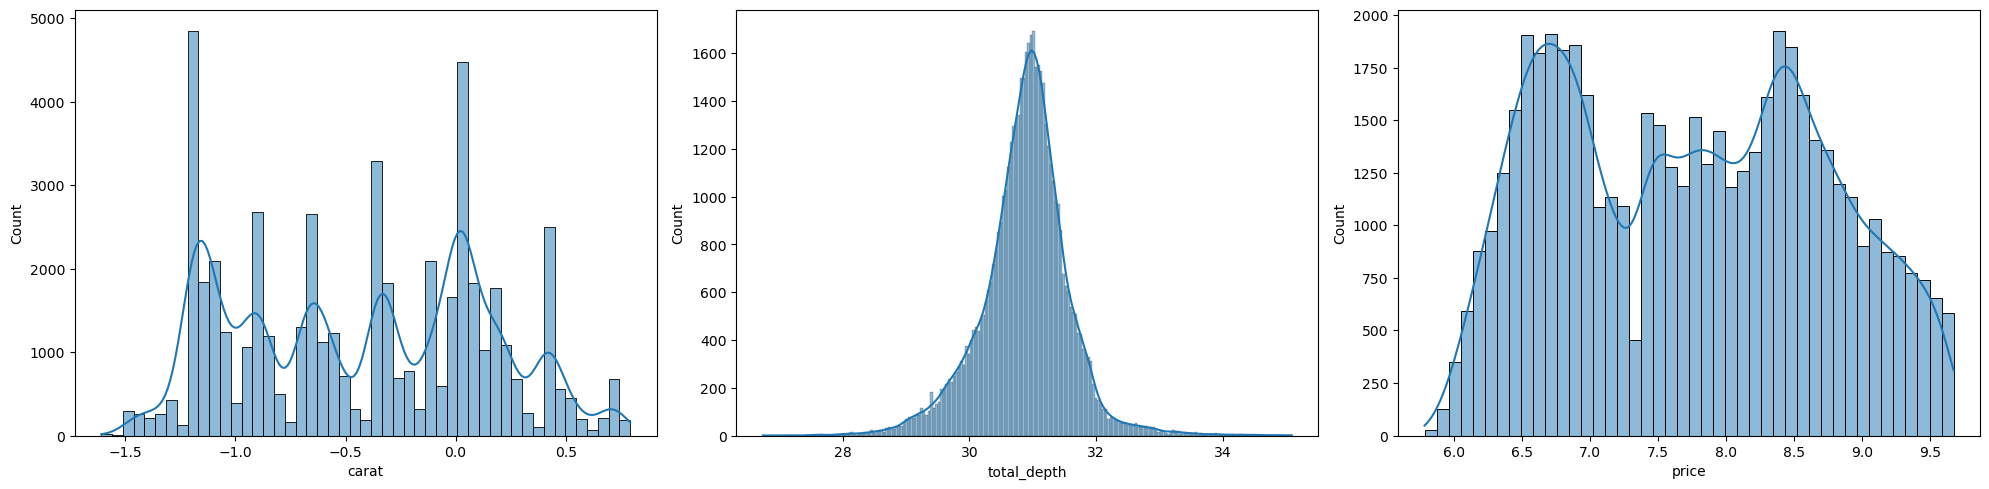

In [37]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(data=df2, x="carat", kde=True, ax=axes[0])
sns.histplot(data=df2, x="total_depth", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

> Applying a log transformation to our data has significantly improved its skewness, specially for carat and price columns.

**Standardisation (Z-score Normalisation)**

Scaling and centering the data using Z-score normalization, also known as standard scaling

In [38]:
# normalize (subract mean and divide by std)

df2['carat'] = (df2['carat'] - df2['carat'].mean()) / df2['carat'].std()
df2['total_depth'] = (df2['total_depth'] - df2['total_depth'].mean()) / df2['total_depth'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()

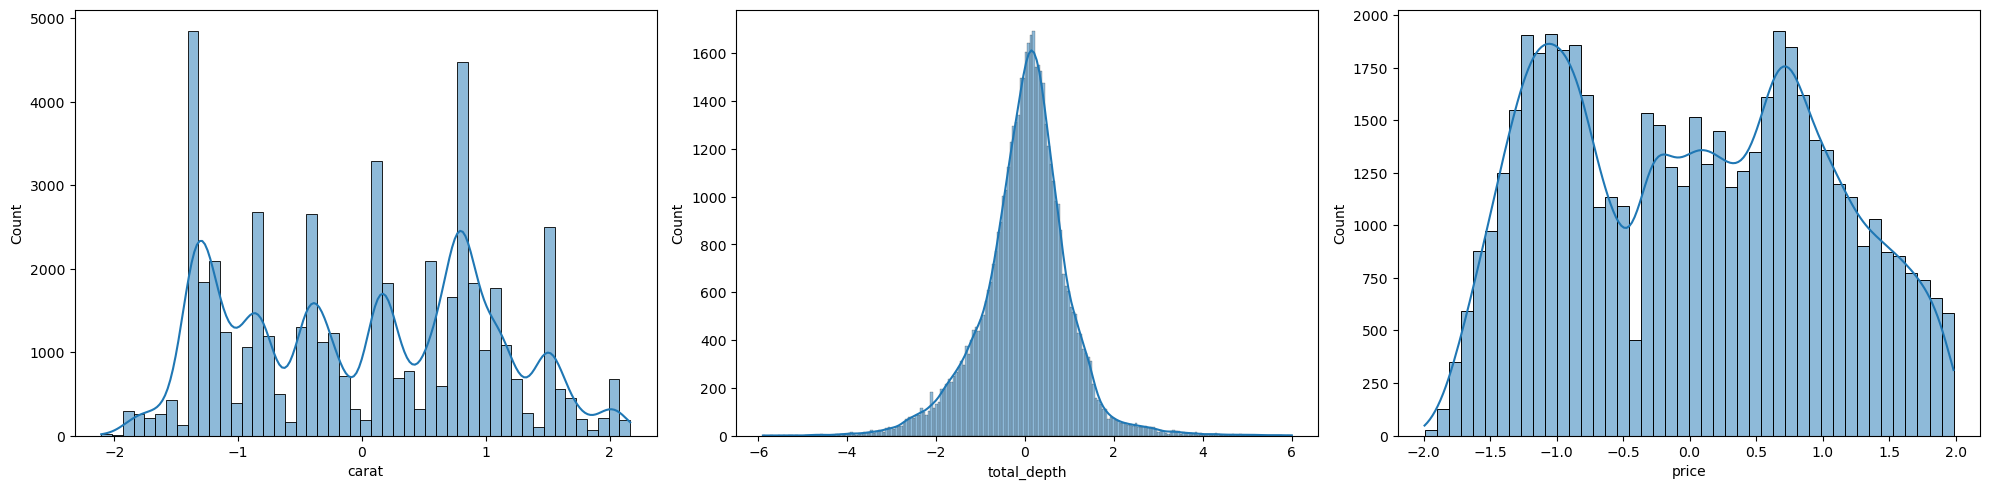

In [39]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(data=df2, x="carat", kde=True, ax=axes[0])
sns.histplot(data=df2, x="total_depth", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

> It's important to note that standardization doesn't change the shape of the data's distribution; it only scales and centers the data.

In [40]:
# Doing the second iteration
X2 = df2.drop(['price'], axis = 1)
X2_columns = "+".join(X2.columns)

In [41]:
ols_formula = Y + "~" + X2_columns

OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.487e+05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:25:25   Log-Likelihood:                 30622.
No. Observations:               52467   AIC:                        -6.120e+04
Df Residuals:                   52447   BIC:                        -6.103e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6581      0.006   -106.461      0.000      -0.670      -0.646
carat             1.0836      0.001   1615.518      0.000       1.082       1.085
cut_Good          0.0761      0.004     18.664      0.000       0.068       0.084
cut_Ideal         0.1601      0.004     42.093      0.000       0.153       0.168
cut_Premium       0.1381      0.004     35.453      0.000       0.130       0.146
cut_Very_Good     0.1141      0.004     29.548      0.000       0.106       0.122
color_E          -0.0545      0.002    -25.341      0.000      -0.059      -0.050
color_F          -0.0965      0.002    -44.287      0.000      -0.101      -0.092
color_G          -0.1623      0.002    -75.954      0.000      -0.166      -0.158
color_H          -0.2544      0.002   -111.878      0.000      -0.259      -0.250
color_I          -0.3788      0.003   -147.984      0.000      -0.384      -0.374
color_J          -0.5152      0.003   -162.554      0.000      -0.521      -0.509
clarity_IF        1.1007      0.006    175.003      0.000       1.088       1.113
clarity_SI1       0.5727      0.005    105.855      0.000       0.562       0.583
clarity_SI2       0.4055      0.005     74.415      0.000       0.395       0.416
clarity_VS1       0.7963      0.006    144.300      0.000       0.785       0.807
clarity_VS2       0.7257      0.005    133.406      0.000       0.715       0.736
clarity_VVS1      1.0084      0.006    173.034      0.000       0.997       1.020
clarity_VVS2      0.9355      0.006    164.909      0.000       0.924       0.947
total_depth      -0.0005      0.001     -0.866      0.387      -0.002       0.001
==============================================================================
Omnibus:                     3613.444   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13388.572
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       5.413   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> - See a lot of improvements, so much better than the first iteration.
> - An Adjusted R-squared of 0.983 matching the R-squared value indicates that most (if not all) predictors in the model are useful.
> - Skew (0.285) suggests a slight positive skew, means the distribution of the residuals has a minor tail on the right side.
> - Kurtosis (5.467) suggests the distribution has somewhat heavier tails than a normal distribution but acceptable.
> - Cond. No. (32.7). So much improvement. 

**Model assumption: Linearity**

Identify which variables have a linear relationship with the target variable price

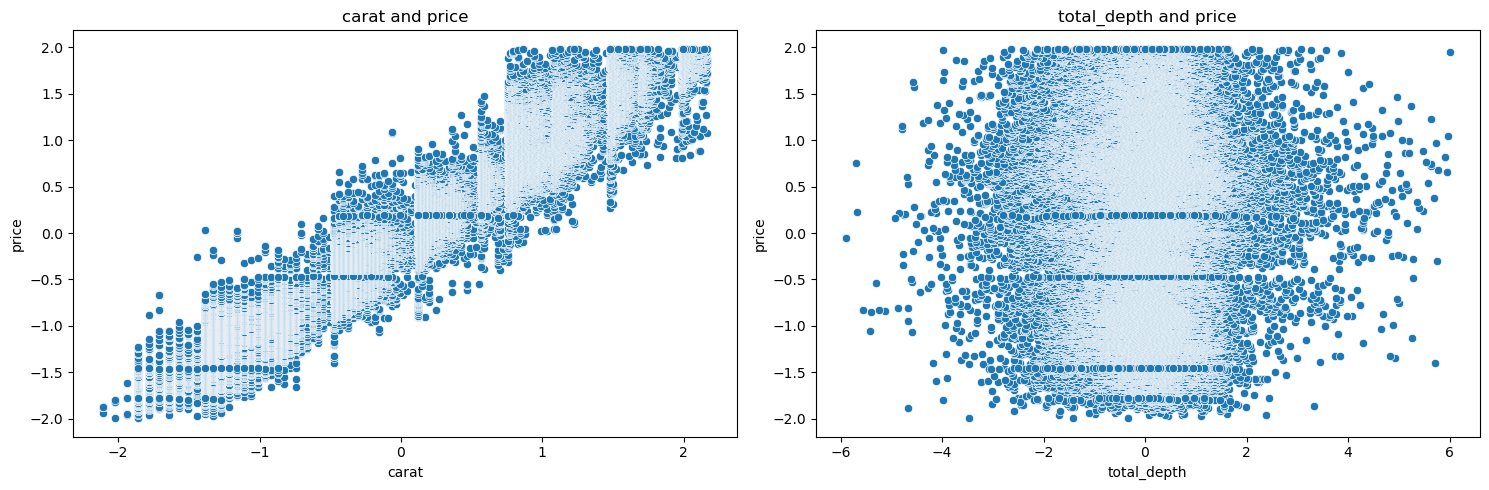

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.scatterplot(x = df2['carat'], y = df2['price'],ax=axes[0])
axes[0].set_title("carat and price")

sns.scatterplot(x = df2['total_depth'], y = df2['price'],ax=axes[1])
axes[1].set_title("total_depth and price")

plt.tight_layout()
plt.show()

>* carat shows a strong linear relationship with price.
>* total_depth shows a weak linear relationship with price.

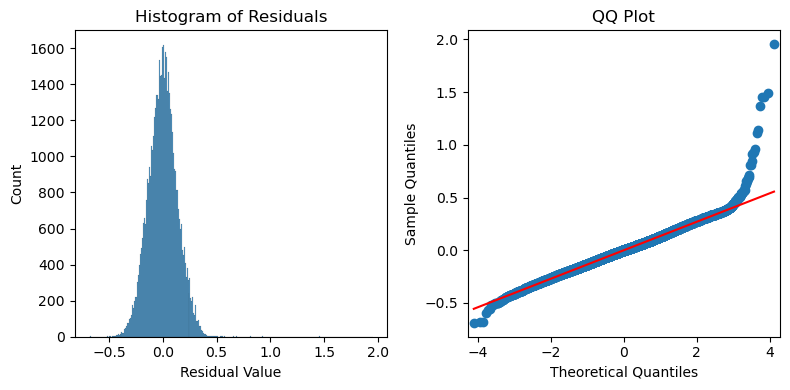

In [43]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

> - I observe a mild positive skewness in the histogram, as well as heavier tails compared to the normal distribution
> - Most of the data points form a straight line in the Q-Q plot, as indicated by the residuals. However, there are some potential outliers.

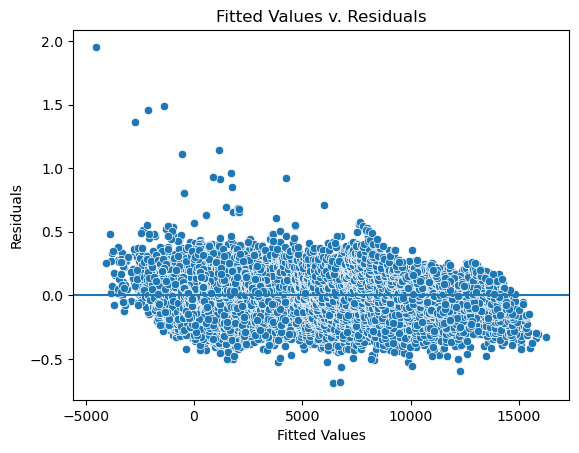

In [44]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

> The spread of residuals seems roughly the same all the way through. 

> I am already satisfied with the model, as it meets all the assumption requirements. Although it does show some potential outliers, I believe it is ready for validation and we can use it for interpretation.

---
### Model Validation

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.01821558520140509
Test Mean Squared Error:  0.018249803442461434


> The training and testing Mean Squared Errors (MSE) are very close, indicating that the model performs consistently on both the data it was trained on and new, unseen data. This consistency suggests the model is not overfitting. The absolute value of the MSE tells about the average squared error, and while it appears relatively low, its interpretation depends on the scale and context of your data. 
Overall, the results seem positive.

In [52]:
# Using K-Fold Cross Validation to verify

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.01822413992471567
Test Mean Squared Error: 0.019179801572727244


> The K-Fold Cross-Validation also shows that the model maintains a small difference between training and testing Mean Squared Error (MSE) values. This indicates a balanced approach, where the model effectively learns from the training data while generalizing well to unseen data.

> Both results are encouraging, as this suggest that the model achieves a balanced fit to the dataset, neither overfitting nor underfitting it. This robust fit captures the underlying patterns well and instills confidence in the model's predictive performance.

In [61]:
# Display model 2 summary for interpretation
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.487e+05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:38:34   Log-Likelihood:                 30622.
No. Observations:               52467   AIC:                        -6.120e+04
Df Residuals:                   52447   BIC:                        -6.103e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6581      0.006   -106.461      0.000      -0.670      -0.646
carat             1.0836      0.001   1615.518      0.000       1.082       1.085
cut_Good          0.0761      0.004     18.664      0.000       0.068       0.084
cut_Ideal         0.1601      0.004     42.093      0.000       0.153       0.168
cut_Premium       0.1381      0.004     35.453      0.000       0.130       0.146
cut_Very_Good     0.1141      0.004     29.548      0.000       0.106       0.122
color_E          -0.0545      0.002    -25.341      0.000      -0.059      -0.050
color_F          -0.0965      0.002    -44.287      0.000      -0.101      -0.092
color_G          -0.1623      0.002    -75.954      0.000      -0.166      -0.158
color_H          -0.2544      0.002   -111.878      0.000      -0.259      -0.250
color_I          -0.3788      0.003   -147.984      0.000      -0.384      -0.374
color_J          -0.5152      0.003   -162.554      0.000      -0.521      -0.509
clarity_IF        1.1007      0.006    175.003      0.000       1.088       1.113
clarity_SI1       0.5727      0.005    105.855      0.000       0.562       0.583
clarity_SI2       0.4055      0.005     74.415      0.000       0.395       0.416
clarity_VS1       0.7963      0.006    144.300      0.000       0.785       0.807
clarity_VS2       0.7257      0.005    133.406      0.000       0.715       0.736
clarity_VVS1      1.0084      0.006    173.034      0.000       0.997       1.020
clarity_VVS2      0.9355      0.006    164.909      0.000       0.924       0.947
total_depth      -0.0005      0.001     -0.866      0.387      -0.002       0.001
==============================================================================
Omnibus:                     3613.444   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13388.572
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       5.413   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

[Interpretation](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/)

1. Carat: For every 1% increase in the size of the diamond (carat), the price increases by approximately 108% on average, holding other factors constant.
2. Cut, Color, and Clarity: Diamonds with better cuts, colors, and clarity grades tend to fetch higher prices, as evident from their positive coefficients.
3. Depth: Although total depth was included in the model, its influence on price wasn't statistically significant based on the given dataset.

## Recommendations:

1. Inventory Procurement: Focus on procuring diamonds that align with attributes customers value the most, i.e., carat, cut, color, and clarity.
2. Marketing and Communication: Emphasize the quality and size (carat) in marketing campaigns as they significantly influence the price and perceived value.
3. Pricing Strategy: Be ready to adjust diamond prices in line with their carat, especially since it has a significant multiplicative effect on the price.
4. Further Research: Since the depth of the diamond didn't significantly impact the price, further qualitative research might be useful to understand if and why customers value depth.